In [23]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sys
from tqdm.notebook import tqdm

In [24]:
epsilon = 1e-12

def sieczne(l,p):
    iterations=0
    x0 = l
    x1 = p
    x = (x0 + x1)/2
    while(abs(f(x)) > epsilon):
        x = x1 - f(x1)*(x1-x0)/(f(x1)-f(x0))
        if f(x) is None or f(x1) is None or x < l  or x > p:
            return None, iterations
        x1, x0 = x, x1
        iterations += 1
    return x, iterations

def newton(l,p):
    iterations = 0
    x = (l + p)/2
    while(abs(f(x)) > epsilon):
        x = x - f(x)/fp(x)
        if f(x) is None or fp(x) is None or x < l or x > p:
            return None, iterations
        iterations += 1
    return x,iterations

In [25]:
def czeb(k): # od 0 do 1
    return [(math.cos((2*j -1)/(2*k) * math.pi) + 1)/2 for j in range(1,k+1)]

In [26]:
def reg(k): # k rowno od 0 do 1
    return [x/(k - 1) for x in range(k)]

In [27]:
def scale(T,l,p): # z [o,1] a [l,p]
    return [x * (p-l) + l for x in T]

In [28]:
def f(x):
    k = 1
    m = 1
    if x < -2*math.pi or x > math.pi:
        return None
    return math.sin(m*x)*math.sin(k*x**2/math.pi)

def fp(x):
    if x < -2*math.pi or x > math.pi:
        return None
    return math.cos(x) * math.sin(x**2/math.pi) + 2 /math.pi * x * math.sin(x) * math.cos(x**2/math.pi)

In [29]:
def diff(Y_1,Y_2):
    diff=0
    for i in range(len(Y_2)):
        diff = max(diff,abs(Y_1[i]-Y_2[i]))
    return diff

def error(Y_1,Y_2):
    error = 0
    for i in range(len(Y_2)):
        error += (Y_1[i] - Y_2[i]) ** 2
    return error/len(Y_1)

In [34]:
points = 100
n = 3000

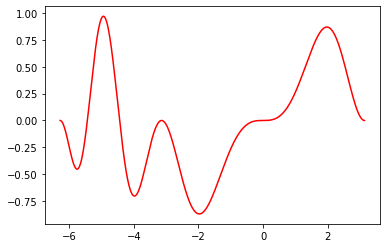

In [35]:
f_X = scale(reg(n),(-2) * math.pi,math.pi)
f_Y = [f(x) for x in f_X]

plt.plot(f_X,f_Y,'r-')

average iteration number:0.1414141414141414


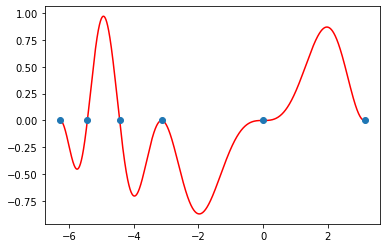

In [36]:
X = scale(reg(points), -2 * math.pi, math.pi)
wyn = []
iterationsSum = 0
for i in range(len(X) - 1):
    temp = sieczne(X[i],X[i+1])
    if(temp[0] is not None and abs(f(temp[0])) < epsilon):
        wyn += [temp[0]]
    iterationsSum += temp[1]

X = [x for x in set(wyn)]
        
Y = [f(x) for x in X]
plt.plot(f_X,f_Y,'r-')
plt.plot(X,Y,'o')
print("average iteration number:", end="")
print(iterationsSum/(points - 1))

average iteration number:1.0606060606060606


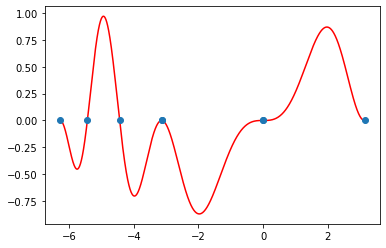

In [37]:
X = scale(reg(points), -2 * math.pi, math.pi)
wyn = []
iterationsSum = 0
for i in range(len(X) - 1):
    temp = newton(X[i],X[i+1])
    if(temp[0] is not None and abs(f(temp[0])) < epsilon):
        wyn += [temp[0]]
    iterationsSum += temp[1]
        
X = [x for x in set(wyn)]
        
Y = [f(x) for x in X]
plt.plot(f_X,f_Y,'r-')
plt.plot(X,Y,'o')
print("average iteration number:", end="")
print(iterationsSum/(points - 1))